# <u>Primethagoras: Finding prime pythagorean triples</u>
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/1/1a/Kapitolinischer_Pythagoras_adjusted.jpg" style="width: 200px; float: left; margin: 0px 10px"/>

A pythagorean triple is an ordered tuple of three numbers such that the square of the largest number is equal to the sum of the squares of the two smaller numbers.

Or, `a² + b² = c²`.

A given triple is `primative` if a, b and c are [relatively prime](https://en.wikipedia.org/wiki/Coprime_integers). A term meaning that they have no common factors (and also incidentally; an awesome [podcast](http://relprime.com/).

So, lets look at finding some relatively prime Pythagorean triples!

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/Pythagorean.svg" style="float: right"/>

### First some helpers for finding primes.

So, if we want to check that a, b and c have no common factors we need to be able to do two things:
* Find prime numbers
* Factorise numbers into their prime components

Now, you could also do this by directly factorising each number but for large input values (which we want to use!) this is going to take waaaaay too long!

So, lets look at finding prime numbers first by using a fantastic method known as the [Sieve of Eratosthenese](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes).

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/Sieve_of_Eratosthenes_animation.gif" />

This is going to take an argument `n` which tells the function the range to check for primes in.

In [73]:
function sieve(n)
    # create an empty vector to store our prime numbers
    primes = zeros(Int, 0)
    # This is going to be a mask that allows us to filter out numbers that
    # are multiples of known composites. (See the animation above!)
    sieve = trues(n)
    for p in 2:n
        if sieve[p] == true
            append!(primes, [p])
            for i in p*p:p:n
                sieve[i] = false
            end
        end
    end
    return primes
end

sieve (generic function with 3 methods)

#### Wait...what?!

Ok, lets break this down and take it step by step:
* First we initialise an empty array of Ints to hold our primes as we find them.
* Next we create a length n array of `true` values to act as our mask. Think of this as: true = number under consideration, false = rejected number.
  * So to begin with, all numbers are valid candidates and we will gradually cut them down to leave only the primes.
* Starting at 2 (the first prime) we check to see if the corresponding entry in our sieve is currently `true`: if it is then we append that number to our list of primes and remove all of its multiples by marking them as false.
* This gets repeated until we reach the end of our desired range.

#### Right, lets look at the number of primes we get vs the size of the input

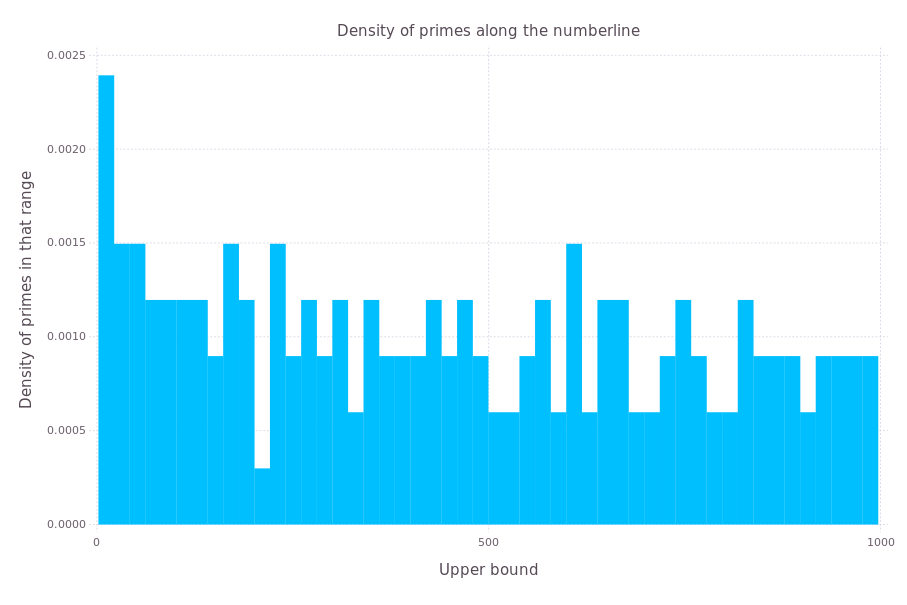

In [38]:
using Gadfly
set_default_plot_size(24cm, 16cm)

plot(
layer(x = sieve(1000), Geom.histogram(bincount=50, density=true)),
Guide.XLabel("Upper bound"),
Guide.YLabel("Density of primes in that range"),
Guide.Title("Density of primes along the numberline"))

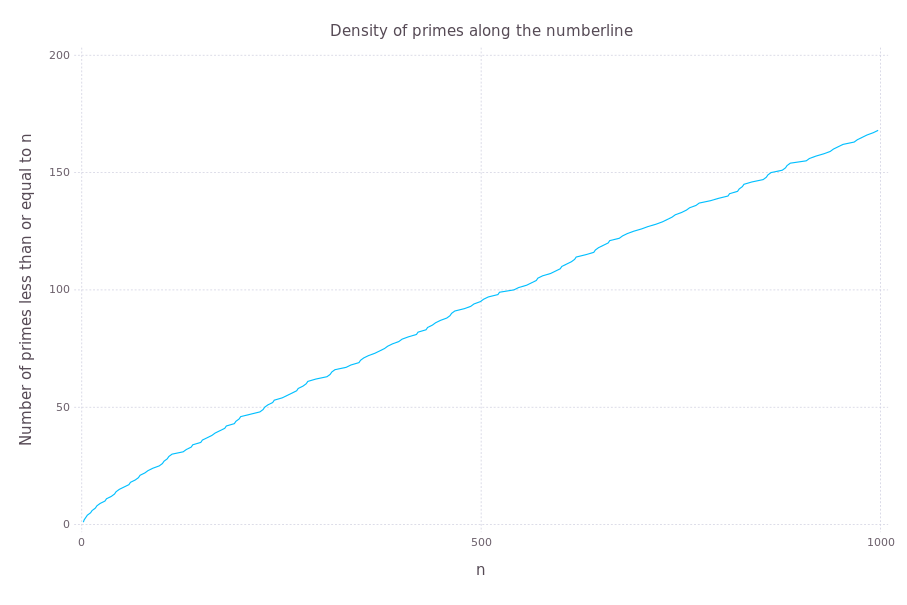

In [41]:
plot(
layer(x = sieve(1000), Geom.line),
Guide.XLabel("n"),
Guide.YLabel("Number of primes less than or equal to n"),
Guide.Title("Density of primes along the numberline"))

### Now for the factorise function

In [60]:
function factorise(number, divisors)
    factors = zeros(Int, 0)
    for n in divisors
        while number % n == 0
            append!(factors, [n])
            number = div(number, n)
        end
    end
    if number != 0
        append!(factors, [number])
    end
    if 1 in factors
        deleteat!(factors, findfirst(factors, 1))
    end
    return factors
end

factorise (generic function with 4 methods)

In [61]:
factorise(123456789, sieve(123456789))

4-element Array{Int64,1}:
    3
    3
 3607
 3803

### Ok, does this work?

In [48]:
prod(factorise(123456789)) == 123456789

true

### Awesome! Now to actually try and build our list of relatively prime triples

# Warning! Optimisations ahead!

In [96]:
function orderedtriple(arr)
    # Return true if the input is an ordered Pythgorean triple
    return (arr[1] < arr[2] < arr[3]) & (arr[1]^2 + arr[2]^2 == arr[3]^2)
end


function primethagoras(u)
    # u is the upperbound to search to
    candidates = filter(orderedtriple, [(a,b,c) for a=1:u, b=1:u, c=1:u])
    primetrips = Tuple{Int, Int, Int}[]
    primes = sieve(u)
    for candidate in candidates
        pfactors = factorise(candidate[3], primes)
        for p in pfactors
            if (candidate[1] % p == 0) & (candidate[2] % p == 0)
                break
            else
                if p == pfactors[end]
                    push!(primetrips, candidate)
                    print
                end
            end
        end
    end
    return primetrips
end

primethagoras (generic function with 1 method)

In [97]:
primethagoras(100)

17-element Array{Tuple{Int64,Int64,Int64},1}:
 (3,4,5)   
 (5,12,13) 
 (8,15,17) 
 (7,24,25) 
 (7,24,25) 
 (20,21,29)
 (12,35,37)
 (9,40,41) 
 (28,45,53)
 (11,60,61)
 (33,56,65)
 (16,63,65)
 (48,55,73)
 (36,77,85)
 (13,84,85)
 (39,80,89)
 (65,72,97)

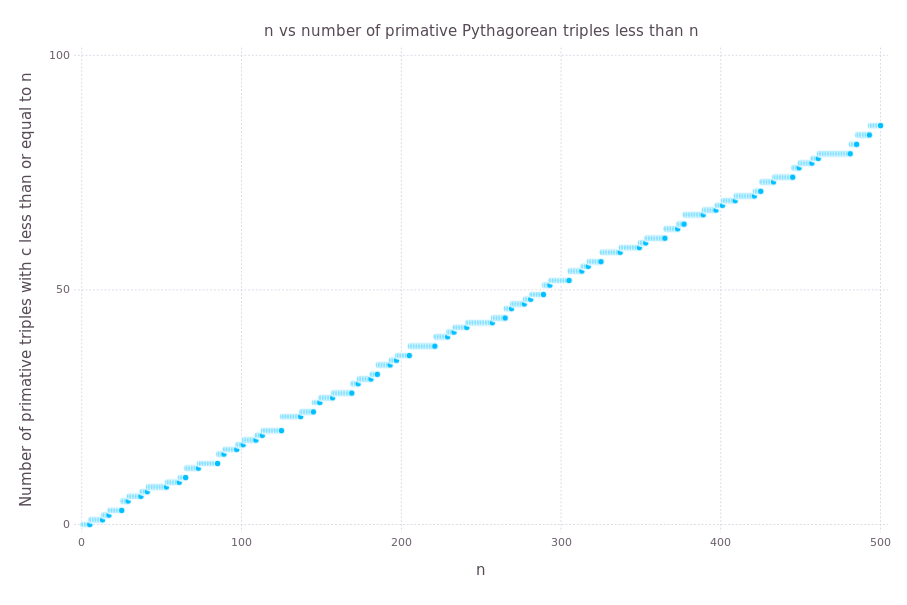

In [116]:
tripston = primethagoras(500)

ntrips = []
for n in 1:500
    t = filter(arr -> arr[3] < n, tripston)
    push!(ntrips, length(t))
end

plot(
layer(x = 1:500, y = ntrips, Geom.point),
Guide.XLabel("n"),
Guide.YLabel("Number of primative triples with c less than or equal to n"),
Guide.Title("n vs number of primative Pythagorean triples less than n"))